In [88]:
import numpy as np
import pandas as pd

In [89]:
df=pd.read_csv("dataset_merge.csv")

In [90]:
df.describe()

,ImageID,LabelName1,LabelName2,Height,Width,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,ReferringExpression
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000
unique,7331,2294,2884,450,325,777,883,611,774,781,901,626,766,7478
top,150418,man,people,600,500,0,499,0,332,0,499,0,598,people is present
freq,8,795,312,1366,2602,433,81,317,84,398,94,311,90,17


In [91]:
df.drop(df.iloc[:, 3:13], inplace = True, axis = 1)

In [92]:
df.describe()

,ImageID,LabelName1,LabelName2,ReferringExpression
count,8000,8000,8000,8000
unique,7331,2294,2884,7478
top,150418,man,people,people is present
freq,8,795,312,17


In [93]:
ref=list(df['ReferringExpression'])

In [96]:
ref[1]

'The person wearing a suit is sitting on the white toilet inside bathroom.'

In [10]:
import nltk

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dongziming/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
text = nltk.word_tokenize('man next to the bus')
a=nltk.pos_tag(text)
a

[('man', 'NN'), ('next', 'IN'), ('to', 'TO'), ('the', 'DT'), ('bus', 'NN')]

In [38]:
vb=['VB','VBD','VBG','VBN','VBP','VBZ']
postion=['IN']

In [49]:
def test(a):
    if 'VBZ' in a:
        print('hello')
    else:
        print('no')

In [54]:
import nltk
import re
import time
from nltk.tokenize import word_tokenize

In [76]:
example = "The overweight chubby person is throwing the sports ball in the person's hands."
word_tokens = word_tokenize(example)
pos = nltk.pos_tag(word_tokens)
selective_pos = vb
selective_pos_words = []
for word,tag in pos:
     if tag in selective_pos:
        selective_pos_words.append((word,tag))
print(selective_pos_words)

for i in range(len(selective_pos_words)):
    print(selective_pos_words[i][0])

[('is', 'VBZ'), ('throwing', 'VBG')]
is
throwing


In [107]:
def extract_verb(sentence):
    vb=['VB','VBD','VBG','VBN','VBP','VBZ']
    word_tokens = word_tokenize(sentence)
    pos = nltk.pos_tag(word_tokens)
    selective_pos = vb
    selective_pos_words = []
    for word,tag in pos:
        if tag in selective_pos:
            selective_pos_words.append((word,tag))
    vb_list=[]
    for i in range(len(selective_pos_words)):
        vb_list.append(selective_pos_words[i][0])
    return vb_list

In [108]:
extract_verb("The man is sitting on the white toilet in the restroom.")

['is', 'sitting']

In [109]:
#verb
total_verb=[]
for i in range(len(ref)):
    total_verb.append(extract_verb(ref[i]))

In [110]:
total_verb

[['is', 'sitting'],
 ['wearing', 'is', 'sitting'],
 ['is', 'sitting'],
 ['is', 'sitting'],
 ['is', 'sitting'],
 ['is', 'looking'],
 ['dressed', 'is', 'sitting'],
 ['is', 'touching'],
 ['is', 'standing'],
 ['is', 'sitting'],
 ['wearing', 'is', 'sitting', 'paneled'],
 ['is', 'flushing'],
 ['is', 'bending'],
 ['is'],
 ['wearing', 'is', 'taking'],
 ['is', 'acting'],
 ['is', 'laying'],
 ['is', 'cleaning'],
 ['is', 'standing'],
 ['is', 'drinking'],
 ['is', 'standing'],
 ['is', 'taking'],
 ['is', 'cleaning'],
 ['is', 'standing'],
 ['is', 'cleaning'],
 ['is', 'sitting'],
 ['wearing', 'is', 'opening'],
 ['wearing', 'is', 'standing'],
 ['is', 'standing'],
 ['is', 'making'],
 ['is', 'standing'],
 ['is', 'sitting'],
 ['is', 'sitting'],
 ['is', 'sitting'],
 ['wearing', 'is', 'sitting'],
 ['is', 'touching'],
 ['is', 'flushing'],
 ['wearing', 'is', 'kneeling'],
 ['wearing', 'is'],
 ['is', 'sitting'],
 ['is', 'sitting'],
 ['wearing', 'is', 'kicking', 'disgusting'],
 ['wearing', 'is', 'sitting'],
 ['is

In [114]:
def extract_position(sentence):
    vb=['IN']
    word_tokens = word_tokenize(sentence)
    pos = nltk.pos_tag(word_tokens)
    selective_pos = vb
    selective_pos_words = []
    for word,tag in pos:
        if tag in selective_pos:
            selective_pos_words.append((word,tag))
    vb_list=[]
    for i in range(len(selective_pos_words)):
        vb_list.append(selective_pos_words[i][0])
    return vb_list

In [115]:
#Preposition
total_pos=[]
for i in range(len(ref)):
    total_pos.append(extract_position(ref[i]))

In [116]:
total_pos

[['on', 'in'],
 ['on', 'inside'],
 ['on', 'on'],
 [],
 ['on'],
 ['in', 'near'],
 ['in', 'on'],
 ['in', 'in'],
 ['in', 'over', 'in'],
 ['on'],
 ['near', 'in'],
 ['on'],
 ['near', 'in'],
 ['beside', 'at', 'of'],
 ['of', 'against'],
 ['over', 'on'],
 ['on', 'in'],
 ['in'],
 ['near', 'against'],
 ['from', 'in'],
 ['near', 'in'],
 ['of', 'in'],
 ['near'],
 ['near', 'on'],
 ['in'],
 ['atop', 'next'],
 [],
 ['over', 'by'],
 ['near', 'against'],
 ['near', 'under'],
 ['near', 'in'],
 ['in', 'on', 'under'],
 ['on', 'in'],
 ['on', 'on'],
 ['on'],
 ['in'],
 ['in'],
 ['beside', 'by'],
 ['near', 'on'],
 ['on'],
 ['in', 'of', 'on'],
 [],
 ['on'],
 ['near', 'on'],
 ['next'],
 ['on', 'against'],
 ['on', 'in'],
 ['on', 'in'],
 ['near', 'behind'],
 ['in', 'of'],
 ['in'],
 ['in'],
 [],
 ['on'],
 ['under'],
 ['beside'],
 ['with'],
 ['in'],
 ['in'],
 ['on'],
 ['in'],
 ['with', 'on'],
 ['for', 'on'],
 ['bear', 'by'],
 ['at'],
 ['in'],
 [],
 ['with'],
 ['by', 'on'],
 [],
 ['beside'],
 [],
 ['at', 'on'],
 [],


In [117]:
import itertools
total_verb=list(itertools.chain.from_iterable(total_verb))

In [119]:
len(total_verb)

12418

In [120]:
total_verb

['is',
 'sitting',
 'wearing',
 'is',
 'sitting',
 'is',
 'sitting',
 'is',
 'sitting',
 'is',
 'sitting',
 'is',
 'looking',
 'dressed',
 'is',
 'sitting',
 'is',
 'touching',
 'is',
 'standing',
 'is',
 'sitting',
 'wearing',
 'is',
 'sitting',
 'paneled',
 'is',
 'flushing',
 'is',
 'bending',
 'is',
 'wearing',
 'is',
 'taking',
 'is',
 'acting',
 'is',
 'laying',
 'is',
 'cleaning',
 'is',
 'standing',
 'is',
 'drinking',
 'is',
 'standing',
 'is',
 'taking',
 'is',
 'cleaning',
 'is',
 'standing',
 'is',
 'cleaning',
 'is',
 'sitting',
 'wearing',
 'is',
 'opening',
 'wearing',
 'is',
 'standing',
 'is',
 'standing',
 'is',
 'making',
 'is',
 'standing',
 'is',
 'sitting',
 'is',
 'sitting',
 'is',
 'sitting',
 'wearing',
 'is',
 'sitting',
 'is',
 'touching',
 'is',
 'flushing',
 'wearing',
 'is',
 'kneeling',
 'wearing',
 'is',
 'is',
 'sitting',
 'is',
 'sitting',
 'wearing',
 'is',
 'kicking',
 'disgusting',
 'wearing',
 'is',
 'sitting',
 'is',
 'is',
 'standing',
 'standing

In [170]:
import numpy as np 
# function to get unique values 
def unique(list1): 
    x = np.array(list1) 
    print(len(list(np.unique(x))))

In [172]:
unique(total_pos)

67


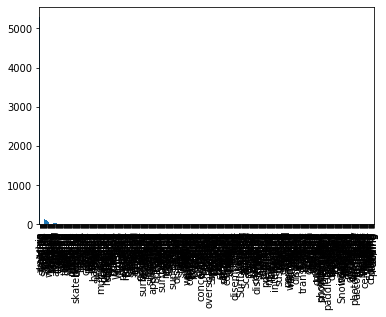

In [160]:
pd.Series(total_verb).value_counts().plot(kind='bar')

In [121]:
import itertools
total_pos=list(itertools.chain.from_iterable(total_pos))

In [123]:
len(total_pos)

7695

In [124]:
total_pos

['on',
 'in',
 'on',
 'inside',
 'on',
 'on',
 'on',
 'in',
 'near',
 'in',
 'on',
 'in',
 'in',
 'in',
 'over',
 'in',
 'on',
 'near',
 'in',
 'on',
 'near',
 'in',
 'beside',
 'at',
 'of',
 'of',
 'against',
 'over',
 'on',
 'on',
 'in',
 'in',
 'near',
 'against',
 'from',
 'in',
 'near',
 'in',
 'of',
 'in',
 'near',
 'near',
 'on',
 'in',
 'atop',
 'next',
 'over',
 'by',
 'near',
 'against',
 'near',
 'under',
 'near',
 'in',
 'in',
 'on',
 'under',
 'on',
 'in',
 'on',
 'on',
 'on',
 'in',
 'in',
 'beside',
 'by',
 'near',
 'on',
 'on',
 'in',
 'of',
 'on',
 'on',
 'near',
 'on',
 'next',
 'on',
 'against',
 'on',
 'in',
 'on',
 'in',
 'near',
 'behind',
 'in',
 'of',
 'in',
 'in',
 'on',
 'under',
 'beside',
 'with',
 'in',
 'in',
 'on',
 'in',
 'with',
 'on',
 'for',
 'on',
 'bear',
 'by',
 'at',
 'in',
 'with',
 'by',
 'on',
 'beside',
 'at',
 'on',
 'in',
 'in',
 'with',
 'in',
 'with',
 'with',
 'with',
 'behind',
 'with',
 'on',
 'by',
 'with',
 'on',
 'at',
 'between',
 '

In [125]:
import collections

In [126]:
verb_dic = collections.Counter(total_verb)

In [127]:
verb_dic

Counter({'is': 5291,
         'sitting': 416,
         'wearing': 1124,
         'looking': 99,
         'dressed': 49,
         'touching': 12,
         'standing': 269,
         'paneled': 1,
         'flushing': 2,
         'bending': 6,
         'taking': 17,
         'acting': 1,
         'laying': 28,
         'cleaning': 9,
         'drinking': 9,
         'opening': 4,
         'making': 11,
         'kneeling': 4,
         'kicking': 11,
         'disgusting': 1,
         'parceling': 1,
         'holding': 565,
         'snuggling': 4,
         'smiling': 28,
         'hugging': 5,
         'cuddling': 1,
         'being': 72,
         'held': 57,
         'staring': 2,
         'posing': 20,
         'sleeping': 10,
         'grabbing': 3,
         'siting': 3,
         'strapped': 3,
         'playing': 118,
         'riding': 363,
         'throwing': 8,
         'showing': 10,
         'carrying': 62,
         'multicolored': 4,
         'seated': 4,
         'petting': 5

In [139]:
import operator
pos_dic = collections.Counter(total_pos)
sorted_pos_dic = dict(sorted(pos_dic.items(), key=operator.itemgetter(1),reverse=True))

In [142]:
top_pos=[]
for i in range(10):
    top_pos.append(list(sorted_pos_dic.items())[i])

In [143]:
top_pos

[('on', 2682),
 ('in', 2458),
 ('of', 697),
 ('with', 438),
 ('near', 184),
 ('at', 176),
 ('by', 157),
 ('as', 119),
 ('under', 113),
 ('behind', 108)]

In [144]:
verb_dic = collections.Counter(total_verb)
sorted_verb_dic = dict(sorted(verb_dic.items(), key=operator.itemgetter(1),reverse=True))
top_verb=[]
for i in range(10):
    top_verb.append(list(sorted_verb_dic.items())[i])

In [145]:
top_verb

[('is', 5291),
 ('are', 1253),
 ('wearing', 1124),
 ('holding', 565),
 ('sitting', 416),
 ('riding', 363),
 ('standing', 269),
 ('has', 134),
 ('walking', 123),
 ('swinging', 122)]

In [146]:
import matplotlib.pyplot as plt

In [148]:
df_pos=pd.DataFrame(top_pos) 

In [149]:
df_pos

,0,1
0,on,2682
1,in,2458
2,of,697
3,with,438
4,near,184
5,at,176
6,by,157
7,as,119
8,under,113
9,behind,108


In [150]:
df_verb=pd.DataFrame(top_verb) 
df_verb

,0,1
0,is,5291
1,are,1253
2,wearing,1124
3,holding,565
4,sitting,416
5,riding,363
6,standing,269
7,has,134
8,walking,123
9,swinging,122


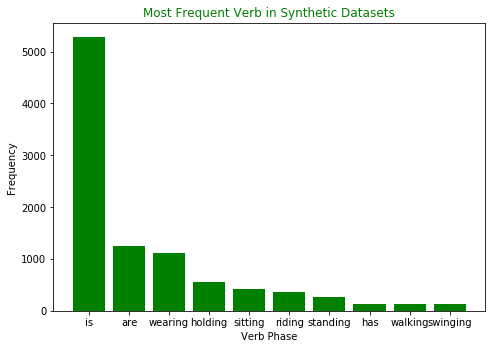

In [187]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(df_verb[0]),list(df_verb[1]),color=('Green'))
plt.xlabel("Verb Phase")
plt.ylabel("Frequency")
plt.title('Most Frequent Verb in Synthetic Datasets',color=('Green'))
plt.show()

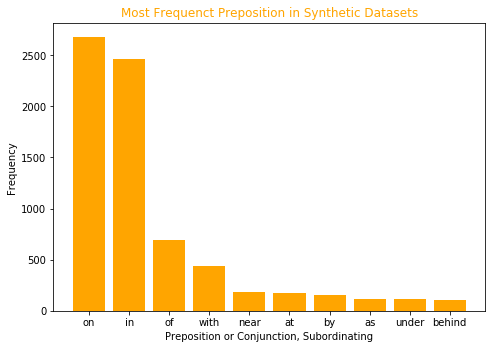

In [188]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(df_pos[0]),list(df_pos[1]),color=('orange'))
plt.xlabel("Preposition or Conjunction, Subordinating")
plt.ylabel("Frequency")
plt.title('Most Frequenct Preposition in Synthetic Datasets',color=('orange'))
plt.show()

In [164]:
list(df_verb[0])

['is',
 'are',
 'wearing',
 'holding',
 'sitting',
 'riding',
 'standing',
 'has',
 'walking',
 'swinging']

In [166]:
np.arange(3)

array([0, 1, 2])